In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

global_min_steps = 500
global_max_steps = 50000
global_min_points = 10

In [2]:
generate_default_plot_env()

In [3]:
step_moves_df = pd.read_csv('../data/steps_diff_vs_ws_diff_14d.csv')
step_moves_21d_df = pd.read_csv('../data/steps_diff_vs_ws_diff_21d.csv')
step_moves_30d_df = pd.read_csv('../data/steps_diff_vs_ws_diff_30d.csv')

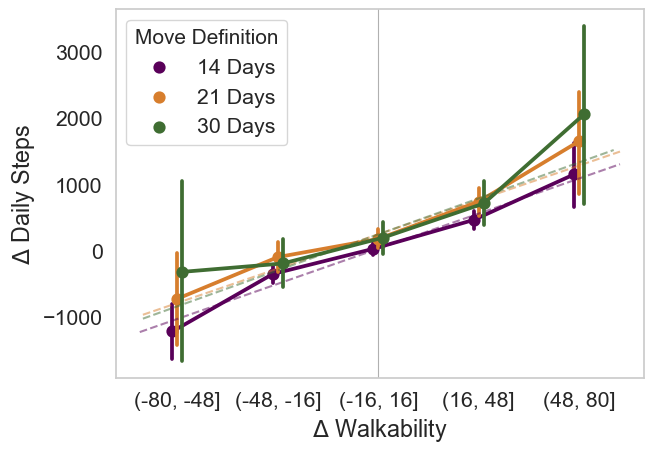

In [5]:
sns.despine(left=True)

step_moves_df['Move Definition'] = '14 Days'
step_moves_21d_df['Move Definition'] = '21 Days'
step_moves_30d_df['Move Definition'] = '30 Days'

walkscore_moves_df = pd.concat([step_moves_df, step_moves_21d_df, step_moves_30d_df],
                               ignore_index=True)
g = sns.pointplot(y='steps_diff', x='ws_diff_bin', data=walkscore_moves_df,
                  hue='Move Definition', palette=['#590059', '#d77e2d', '#3f6d32'],
                  dodge=0.1)
g.axvline(x=2, color='#b0b0b0', linewidth=0.8, zorder=-1)

color = '#590059'
sns.regplot(x=2.5 + (step_moves_df['ws_diff'] - 16)/32, y=step_moves_df['steps_diff'], 
            x_bins=range(-2, 2+1, 1), scatter=False, ci=None, ax=g, color=color, 
            line_kws={'linestyle': '--', 'linewidth': 1.5, 'color': color, 'alpha': 0.5})

color = '#d77e2d'
sns.regplot(x=2.5 + (step_moves_21d_df['ws_diff'] - 16)/32, y=step_moves_21d_df['steps_diff'], 
            x_bins=range(-2, 2+1, 1), scatter=False, ci=None, ax=g, color=color, 
            line_kws={'linestyle': '--', 'linewidth': 1.5, 'color': color, 'alpha': 0.5})

color = '#3f6d32'
sns.regplot(x=2.5 + (step_moves_30d_df['ws_diff'] - 16)/32, y=step_moves_30d_df['steps_diff'], 
            x_bins=range(-2, 2+1, 1), scatter=False, ci=None, ax=g, color=color, 
            line_kws={'linestyle': '--', 'linewidth': 1.5, 'color': color, 'alpha': 0.5})

g.legend_.get_title().set_fontsize('15') #legend 'Title' fontsize

plt.setp(g.get_xticklabels(), rotation=0)
plt.grid(False)

g.set_xlabel('$\Delta$ Walkability')
g.set_ylabel('$\Delta$ Daily Steps')

figure = plt.gcf() # get current figure
figure.set_size_inches(7, 5)
plt.tight_layout()
plt.savefig('../output/fig16.pdf', dpi=300)